In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df = pd.read_csv('tradelog.csv')
df

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
0,1,BANKNIFTY09JUL2022800PE,08-07-2020 09:29,163.50,08-07-2020 13:15,301.00
1,2,BANKNIFTY09JUL2022700CE,09-07-2020 09:29,162.50,09-07-2020 10:34,166.75
2,3,BANKNIFTY09JUL2022700PE,09-07-2020 09:29,110.55,09-07-2020 10:34,147.00
3,4,BANKNIFTY16JUL2022700CE,10-07-2020 09:29,295.10,10-07-2020 15:24,437.55
4,5,BANKNIFTY16JUL2022700PE,10-07-2020 09:29,555.20,10-07-2020 15:24,403.15
...,...,...,...,...,...,...
244,245,BANKNIFTY31DEC2031300PE,29-12-2020 09:29,216.65,29-12-2020 13:10,274.60
245,246,BANKNIFTY31DEC2031200CE,30-12-2020 09:29,248.25,30-12-2020 10:24,283.90
246,247,BANKNIFTY31DEC2031200PE,30-12-2020 09:29,221.70,30-12-2020 10:24,240.10
247,248,BANKNIFTY31DEC2031300CE,31-12-2020 09:29,161.80,31-12-2020 10:37,173.85


In [12]:
# Initial portfolio value
initial_portfolio_value = 6500

In [4]:
# checking a Df last 5 value :
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
0,1,BANKNIFTY09JUL2022800PE,08-07-2020 09:29,163.50,08-07-2020 13:15,301.00
1,2,BANKNIFTY09JUL2022700CE,09-07-2020 09:29,162.50,09-07-2020 10:34,166.75
2,3,BANKNIFTY09JUL2022700PE,09-07-2020 09:29,110.55,09-07-2020 10:34,147.00
3,4,BANKNIFTY16JUL2022700CE,10-07-2020 09:29,295.10,10-07-2020 15:24,437.55
4,5,BANKNIFTY16JUL2022700PE,10-07-2020 09:29,555.20,10-07-2020 15:24,403.15


In [6]:
# informatiom of the data table 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   249 non-null    int64  
 1   Ticker       249 non-null    object 
 2   Entry Time   249 non-null    object 
 3   Entry Price  249 non-null    float64
 4   Exit Time    249 non-null    object 
 5   Exit Price   249 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.8+ KB


In [7]:
df.describe() # describing a dataset and and find mean mode and standard Value of 

,Unnamed: 0,Entry Price,Exit Price
count,249.000000,249.000000,249.000000
mean,125.000000,290.172088,296.237952
std,72.024301,156.365324,111.674469
min,1.000000,43.250000,87.150000
25%,63.000000,172.050000,198.300000
50%,125.000000,262.500000,305.800000
75%,187.000000,356.650000,377.000000
max,249.000000,857.550000,582.800000


In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().any()

Unnamed: 0     False
Ticker         False
Entry Time     False
Entry Price    False
Exit Time      False
Exit Price     False
dtype: bool

## Analysis Data

In [23]:
df.shape[0]
df

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
0,1,BANKNIFTY09JUL2022800PE,08-07-2020 09:29,163.50,08-07-2020 13:15,301.00
1,2,BANKNIFTY09JUL2022700CE,09-07-2020 09:29,162.50,09-07-2020 10:34,166.75
2,3,BANKNIFTY09JUL2022700PE,09-07-2020 09:29,110.55,09-07-2020 10:34,147.00
3,4,BANKNIFTY16JUL2022700CE,10-07-2020 09:29,295.10,10-07-2020 15:24,437.55
4,5,BANKNIFTY16JUL2022700PE,10-07-2020 09:29,555.20,10-07-2020 15:24,403.15
...,...,...,...,...,...,...
244,245,BANKNIFTY31DEC2031300PE,29-12-2020 09:29,216.65,29-12-2020 13:10,274.60
245,246,BANKNIFTY31DEC2031200CE,30-12-2020 09:29,248.25,30-12-2020 10:24,283.90
246,247,BANKNIFTY31DEC2031200PE,30-12-2020 09:29,221.70,30-12-2020 10:24,240.10
247,248,BANKNIFTY31DEC2031300CE,31-12-2020 09:29,161.80,31-12-2020 10:37,173.85


In [21]:
total_trades =df.groupby(['Ticker','Entry Time','Entry Price','Exit Time','Exit Price']).size().reset_index(name='Trade Count').shape[0]
print(f'total Trades: {total_trades}')

total Trades: 245


In [28]:
# Calculating Profit for dataset

df['Profit'] = (df['Exit Price'] - df['Entry Price'])

# Filter for Profitable trades (where Profit > 0)
Profitable_trades = df[df['Profit'] > 0]

# Display the DataFrame of Profitable Trades 
Profitable_trades



,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,total_trades,Profit
0,1,BANKNIFTY09JUL2022800PE,08-07-2020 09:29,163.50,08-07-2020 13:15,301.00,249,137.50
1,2,BANKNIFTY09JUL2022700CE,09-07-2020 09:29,162.50,09-07-2020 10:34,166.75,249,4.25
2,3,BANKNIFTY09JUL2022700PE,09-07-2020 09:29,110.55,09-07-2020 10:34,147.00,249,36.45
3,4,BANKNIFTY16JUL2022700CE,10-07-2020 09:29,295.10,10-07-2020 15:24,437.55,249,142.45
5,6,BANKNIFTY16JUL2022600CE,13-07-2020 09:29,229.35,13-07-2020 11:11,370.55,249,141.20
...,...,...,...,...,...,...,...,...
244,245,BANKNIFTY31DEC2031300PE,29-12-2020 09:29,216.65,29-12-2020 13:10,274.60,249,57.95
245,246,BANKNIFTY31DEC2031200CE,30-12-2020 09:29,248.25,30-12-2020 10:24,283.90,249,35.65
246,247,BANKNIFTY31DEC2031200PE,30-12-2020 09:29,221.70,30-12-2020 10:24,240.10,249,18.40
247,248,BANKNIFTY31DEC2031300CE,31-12-2020 09:29,161.80,31-12-2020 10:37,173.85,249,12.05


In [34]:
# Assuming DataFrame 
df['Profit'] = df['Exit Price'] - df['Entry Price']

# Filter for loss-making trades (where Profit < 0)
loss_making_trades = df[df['Profit'] < 0]

# Display the DataFrame of loss-making trades
loss_making_trades


,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,total_trades,Profit,Loss
4,5,BANKNIFTY16JUL2022700PE,10-07-2020 09:29,555.20,10-07-2020 15:24,403.15,249,-152.05,-152.05
6,7,BANKNIFTY16JUL2022600PE,13-07-2020 09:29,590.85,13-07-2020 11:11,356.50,249,-234.35,-234.35
8,9,BANKNIFTY16JUL2021800PE,14-07-2020 09:29,513.65,14-07-2020 10:56,328.55,249,-185.10,-185.10
9,10,BANKNIFTY16JUL2021600CE,15-07-2020 09:29,329.25,15-07-2020 12:03,265.65,249,-63.60,-63.60
11,12,BANKNIFTY16JUL2021100CE,16-07-2020 09:29,244.95,16-07-2020 09:48,135.80,249,-109.15,-109.15
...,...,...,...,...,...,...,...,...,...
234,235,BANKNIFTY24DEC2030300PE,21-12-2020 09:29,498.35,21-12-2020 13:37,309.05,249,-189.30,-189.30
237,238,BANKNIFTY24DEC2029600CE,23-12-2020 09:29,306.85,23-12-2020 14:13,218.15,249,-88.70,-88.70
239,240,BANKNIFTY24DEC2030200CE,24-12-2020 09:29,254.10,24-12-2020 10:15,139.45,249,-114.65,-114.65
241,242,BANKNIFTY31DEC2030800CE,28-12-2020 09:29,348.15,28-12-2020 13:43,328.80,249,-19.35,-19.35


In [35]:

df['Profit'] = df['Exit Price'] - df['Entry Price']

# Filter for profitable trades (where Profit > 0)
profitable_trades = df[df['Profit'] > 0]

# Calculate total number of trades
total_trades = len(df)

# Calculate the number of profitable trades
num_profitable_trades = len(profitable_trades)

# Calculate the win rate
win_rate = num_profitable_trades / total_trades

# Display the win rate
print(f'Win Rate: {win_rate * 100:.2f}%')

Win Rate: 61.45%


### Show Pie Chart Profit,Loss and Win Rate

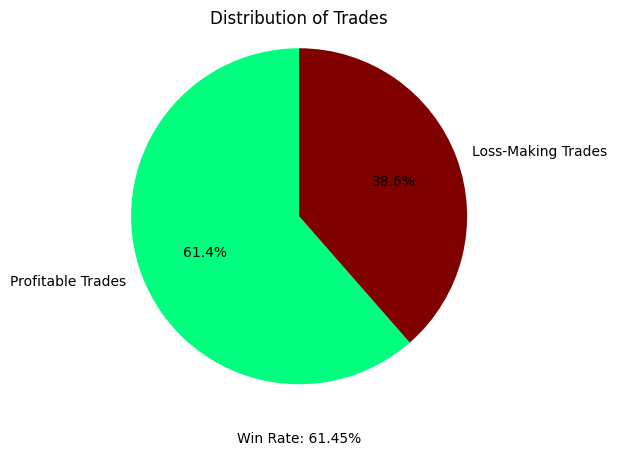

In [49]:
df['Profit'] = df['Exit Price'] - df['Entry Price']

# Calculate the win rate
total_trades = len(df)
profitable_trades = len(df[df['Profit'] > 0])
loss_making_trades = len(df[df['Profit'] < 0])
win_rate = profitable_trades / total_trades

# Create data for the pie chart
labels = ['Profitable Trades', 'Loss-Making Trades']
sizes = [profitable_trades, loss_making_trades]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['springgreen', 'maroon'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the win rate as text
plt.text(0.5, -0.1, f'Win Rate: {win_rate:.2%}', ha='center', va='center', transform=ax.transAxes)

# Display the pie chart
plt.title('Distribution of Trades')
plt.show()


In [50]:
# Calculate the average profit per trade
average_profit_per_trade = df['Profit'].mean()

# Display the average profit per trade
print(f'Average Profit per Trade: {average_profit_per_trade:.2f}')


Average Profit per Trade: 6.07


In [51]:
# Filter for loss-making trades (where Profit < 0)
loss_making_trades = df[df['Profit'] < 0]

# Calculate the average loss per trade
average_loss_per_trade = loss_making_trades['Profit'].mean()

# Display the average loss per trade
print(f'Average Loss per Trade: {abs(average_loss_per_trade):.2f}')

Average Loss per Trade: 105.54


In [52]:
# Calculate the average profit per trade
average_profit_per_trade = df['Profit'].mean()

# Filter for loss-making trades (where Profit < 0)
loss_making_trades = df[df['Profit'] < 0]

# Calculate the average loss per trade
average_loss_per_trade = loss_making_trades['Profit'].mean()

# Calculate the Risk Reward Ratio
risk_reward_ratio = abs(average_profit_per_trade / average_loss_per_trade)

# Display the Risk Reward Ratio
print(f'Risk Reward Ratio: {risk_reward_ratio:.2f}')


Risk Reward Ratio: 0.06


In [58]:
# Calculate the loss rate
loss_rate = 1 - win_rate

# Filter for loss-making trades (where Profit < 0)
loss_making_trades = df[df['Profit'] < 0]

# Calculate the average loss per trade
average_loss_per_trade = loss_making_trades['Profit'].mean()

# Calculate the Expectancy
expectancy = (win_rate * average_profit_per_trade) - (loss_rate * average_loss_per_trade)

# Display the Expectancy
print(f'Expectancy: {expectancy:.2f}')


Expectancy: 44.42


In [60]:
# Calculate the Average ROR per trade
average_ror_per_trade = (average_profit_per_trade - risk_free_rate) / volatility

# Display the Average ROR per trade
print(f'Average ROR per Trade: {average_ror_per_trade:.2f}')

Average ROR per Trade: 60.46


In [64]:
import numpy as np 

# Calculate the standard deviation of returns
returns = df['Profit']
returns_std = np.std(returns)

# Calculate the Sharpe Ratio
sharpe_ratio = (average_profit_per_trade - risk_free_rate) / returns_std

# Display the Sharpe Ratio
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')


Sharpe Ratio: 0.05


In [42]:
# Assuming  DataFrame is named 'data' and contains a 'Portfolio Value' column
# This column represents the value of  portfolio over time

# Calculate the cumulative returns
df['Cumulative Returns'] = (1 + df['Profit'] / df['Entry Price']).cumprod()

# Calculate the cumulative rolling maximum
df['Rolling Max'] = df['Cumulative Returns'].cummax()

# Calculate the drawdown
df['Drawdown'] = df['Cumulative Returns'] / df['Rolling Max'] - 1

# Find the maximum drawdown and its duration
max_drawdown = df['Drawdown'].min()
max_drawdown_percentage = abs(max_drawdown) * 100  # Convert to percentage

# Display the results
print(f'Max Drawdown: {max_drawdown:.2%}')
print(f'Max Drawdown Percentage: {max_drawdown_percentage:.2f}%')

Max Drawdown: -77.38%
Max Drawdown Percentage: 77.38%


In [43]:
# Convert 'Entry Time' and 'Exit Time' to datetime format
df['Entry Time'] = pd.to_datetime(df['Entry Time'], format='%d-%m-%Y %H:%M')
df['Exit Time'] = pd.to_datetime(df['Exit Time'], format='%d-%m-%Y %H:%M')

# Sort the DataFrame by 'Entry Time'
df = df.sort_values(by='Entry Time')

# Calculate the CAGR for each trade
df['CAGR'] = (df['Exit Price'] / df['Entry Price']) ** (1 / ((df['Exit Time'] - df['Entry Time']).dt.days / 365)) - 1

# Calculate the overall CAGR
overall_cagr = (df['Exit Price'].iloc[-1] / df['Entry Price'].iloc[0]) ** (1 / ((df['Exit Time'].max() - df['Entry Time'].min()).days / 365)) - 1

# Display the results
print(f'CAGR for each trade:\n{df["CAGR"]}\n')
print(f'Overall CAGR: {overall_cagr:.2%}')


CAGR for each trade:
0      inf
1      inf
2      inf
3      inf
4     -1.0
      ... 
244    inf
245    inf
246    inf
247    inf
248    inf
Name: CAGR, Length: 249, dtype: float64

Overall CAGR: -43.64%


In [44]:
# Calculate CAGR (Compound Annual Growth Rate)
cagr = (df['Exit Price'].iloc[-1] / df['Entry Price'].iloc[0]) ** (1 / ((df['Exit Time'].max() - df['Entry Time'].min()).days / 365)) - 1

# Calculate Maximum Drawdown (MDD)
df['Cumulative Returns'] = (1 + df['Profit'] / df['Entry Price']).cumprod()
df['Rolling Max'] = df['Cumulative Returns'].cummax()
df['Drawdown'] = df['Cumulative Returns'] / df['Rolling Max'] - 1
max_drawdown = df['Drawdown'].min()

# Calculate Calmar Ratio
calmar_ratio = cagr / abs(max_drawdown)

# Display the results
print(f'CAGR: {cagr:.2%}')
print(f'Maximum Drawdown: {max_drawdown:.2%}')
print(f'Calmar Ratio: {calmar_ratio:.2f}')


CAGR: -43.64%
Maximum Drawdown: -67.25%
Calmar Ratio: -0.65
